# Alpha-Excel 시연

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from alpha_excel import AlphaExcel, Field
from alpha_excel.ops.constants import *
from alpha_excel.ops.arithmetic import *
from alpha_excel.ops.timeseries import *
from alpha_excel.ops.group import *
from alpha_excel.ops.crosssection import *
from alpha_excel.ops.transformation import *
from alpha_excel.portfolio import *

from alpha_database import DataSource

## 시작하기

In [17]:
# DataSource 인스턴스 생성
ds = DataSource()

# AlphaExcel 인스턴스 생성
ae = AlphaExcel(
    data_source=ds,
    start_date="2020-01-01",
    end_date="2024-12-31",
)

In [18]:
ae.universe.head()

symbol      A000020  A000030  A000040  A000050  A000060  A000070  A000080  \
date                                                                        
2020-01-02     True    False     True     True     True     True     True   
2020-01-03     True    False     True     True     True     True     True   
2020-01-06     True    False     True     True     True     True     True   
2020-01-07     True    False     True     True     True     True     True   
2020-01-08     True    False     True     True     True     True     True   

symbol      A000100  A000120  A000140  ...  A950110  A950130  A950140  \
date                                   ...                              
2020-01-02     True     True     True  ...     True     True     True   
2020-01-03     True     True     True  ...     True     True     True   
2020-01-06     True     True     True  ...     True     True     True   
2020-01-07     True     True     True  ...     True     True     True   
2020-01-08     True     True     True  ...     True     True     True   

symbol      A950160  A950170  A950180  A950190  A950200  A950210  A950220  
date                                                                       
2020-01-02     True     True     True    False    False    False    False  
2020-01-03     True     True     True    False    False    False    False  
2020-01-06     True     True     True    False    False    False    False  
2020-01-07     True     True     True    False    False    False    False  
2020-01-08     True     True     True    False    False    False    False  

[5 rows x 2816 columns]

In [19]:
ae.universe.shape

(1231, 2816)

## 데이터 불러오기

In [20]:
returns = Field("returns") # 수익률
returns

Field(name='returns', data_type=None)

In [21]:
industry_group = Field("fnguide_industry_group") # 에프앤가이드 산업분류
industry_group

Field(name='fnguide_industry_group', data_type=None)

데이터를 불러오려면 Expression을 Evaluate 해야 함.

In [22]:
returns_df = ae.evaluate(returns)
returns_df.head()

symbol       A000020  A000030   A000040   A000050   A000060   A000070  \
date                                                                    
2020-01-02  0.010830      NaN  0.010707  0.032328 -0.039216  0.004478   
2020-01-03 -0.004762      NaN -0.010593  0.001044  0.000000 -0.008915   
2020-01-06 -0.021531      NaN -0.021413 -0.005214 -0.029155 -0.037481   
2020-01-07 -0.002445      NaN -0.029384  0.002096 -0.015015  0.010903   
2020-01-08 -0.028186      NaN -0.015137 -0.030335 -0.015244 -0.049307   

symbol       A000080   A000100   A000120   A000140  ...   A950110   A950130  \
date                                                ...                       
2020-01-02 -0.003448 -0.021130 -0.016129  0.000000  ... -0.009756  0.029512   
2020-01-03 -0.012111 -0.004328 -0.029508  0.007576  ... -0.017734  0.004410   
2020-01-06  0.003503 -0.017360 -0.006757  0.015038  ... -0.022066 -0.025796   
2020-01-07 -0.006981  0.017666  0.000000  0.000000  ...  0.025641  0.002254   
2020-01-08 -0.026362 -0.019533 -0.023810 -0.003704  ... -0.027000 -0.057336   

symbol       A950140  A950160   A950170   A950180  A950190  A950200  A950210  \
date                                                                           
2020-01-02  0.011312      0.0  0.038417  0.040625      NaN      NaN      NaN   
2020-01-03  0.050336      0.0 -0.001121  0.048048      NaN      NaN      NaN   
2020-01-06  0.001065      0.0 -0.040404 -0.028653      NaN      NaN      NaN   
2020-01-07  0.006383      0.0 -0.007018  0.002950      NaN      NaN      NaN   
2020-01-08 -0.020085      0.0 -0.048292 -0.029412      NaN      NaN      NaN   

symbol      A950220  
date                 
2020-01-02      NaN  
2020-01-03      NaN  
2020-01-06      NaN  
2020-01-07      NaN  
2020-01-08      NaN  

[5 rows x 2816 columns]

In [23]:
industry_group_df = ae.evaluate(industry_group)
industry_group_df.iloc[18:21] # 산업 분류는 월말에만 데이터가 존재하지만, 불러올 때 자동으로 ffill 처리됨. 

symbol       A000020 A000030   A000040      A000050 A000060 A000070   A000080  \
date                                                                            
2020-01-30  제약 및 바이오     NaN  자동차 및 부품  내구 소비재 및 의류      보험      소재  음식료 및 담배   
2020-01-31  제약 및 바이오     NaN  자동차 및 부품  내구 소비재 및 의류      보험      소재  음식료 및 담배   
2020-02-03  제약 및 바이오     NaN  자동차 및 부품  내구 소비재 및 의류      보험      소재  음식료 및 담배   

symbol       A000100 A000120   A000140  ... A950110     A950130 A950140  \
date                                    ...                               
2020-01-30  제약 및 바이오      운송  음식료 및 담배  ...   소프트웨어  의료장비 및 서비스    생활용품   
2020-01-31  제약 및 바이오      운송  음식료 및 담배  ...   소프트웨어  의료장비 및 서비스    생활용품   
2020-02-03  제약 및 바이오      운송  음식료 및 담배  ...   소프트웨어  의료장비 및 서비스    생활용품   

symbol     A950160 A950170 A950180 A950190 A950200 A950210 A950220  
date                                                                
2020-01-30      유통      유통   소프트웨어     NaN     NaN     NaN     NaN  
2020-01-31      유통      유통   소프트웨어     NaN     NaN     NaN     NaN  
2020-02-03      유통      유통   소프트웨어     NaN     NaN     NaN     NaN  

[3 rows x 2816 columns]

## 연산자 사용하기

### 코스피 인덱스

In [24]:
expr = Field('fnguide_market_cap')
scaler = LongOnlyScaler()

result = ae.evaluate(expr, scaler=scaler)

<Axes: xlabel='date'>

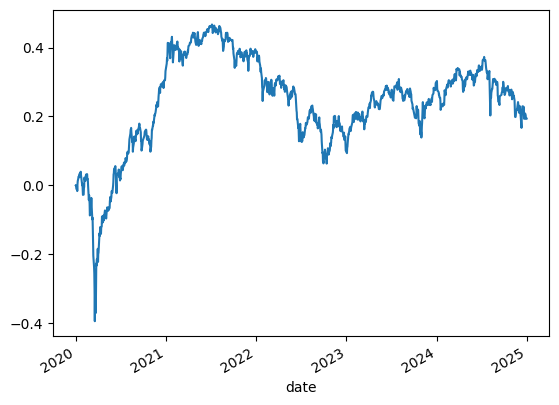

In [25]:
step0 = ae.get_cumulative_pnl(0)

step0.plot()

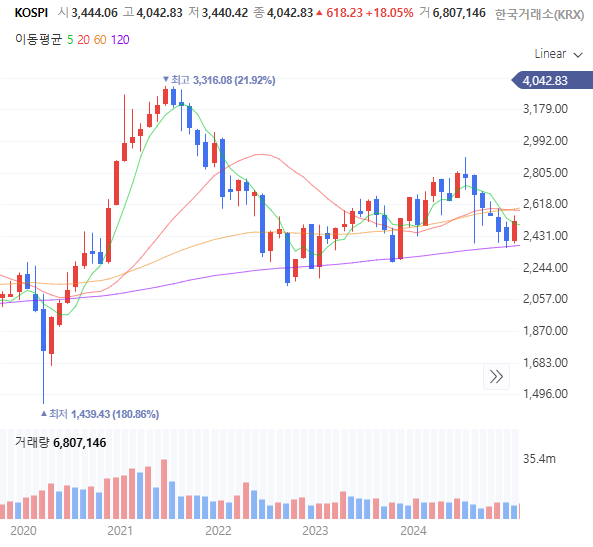

### 롱숏 포트폴리오

In [26]:
expr = GroupNeutralize(
    TsMean(
        Field('returns') * -1, 
        window=5
        ), 
        group_by='fnguide_industry_group'
    )
expr

GroupNeutralize(child=TsMean(child=Multiply(left=Field(name='returns', data_type=None), right=Constant(value=-1)), window=5), group_by='fnguide_industry_group')

In [ ]:
# expr = Field('returns')
# expr

Field(name='returns', data_type=None)

In [32]:
scaler = DollarNeutralScaler() # Long Short의 합은 0, 절대값 합은 2가 되도록 스케일링
# scaler = LongOnlyScaler() # Long Short의 합은 0, 절대값 합은 1이 되도록 스케일링

In [33]:
result = ae.evaluate(expr, scaler=scaler)
result.head()

symbol       A000020  A000030   A000040   A000050   A000060   A000070  \
date                                                                    
2020-01-02  0.010830      NaN  0.010707  0.032328 -0.039216  0.004478   
2020-01-03 -0.004762      NaN -0.010593  0.001044  0.000000 -0.008915   
2020-01-06 -0.021531      NaN -0.021413 -0.005214 -0.029155 -0.037481   
2020-01-07 -0.002445      NaN -0.029384  0.002096 -0.015015  0.010903   
2020-01-08 -0.028186      NaN -0.015137 -0.030335 -0.015244 -0.049307   

symbol       A000080   A000100   A000120   A000140  ...   A950110   A950130  \
date                                                ...                       
2020-01-02 -0.003448 -0.021130 -0.016129  0.000000  ... -0.009756  0.029512   
2020-01-03 -0.012111 -0.004328 -0.029508  0.007576  ... -0.017734  0.004410   
2020-01-06  0.003503 -0.017360 -0.006757  0.015038  ... -0.022066 -0.025796   
2020-01-07 -0.006981  0.017666  0.000000  0.000000  ...  0.025641  0.002254   
2020-01-08 -0.026362 -0.019533 -0.023810 -0.003704  ... -0.027000 -0.057336   

symbol       A950140  A950160   A950170   A950180  A950190  A950200  A950210  \
date                                                                           
2020-01-02  0.011312      0.0  0.038417  0.040625      NaN      NaN      NaN   
2020-01-03  0.050336      0.0 -0.001121  0.048048      NaN      NaN      NaN   
2020-01-06  0.001065      0.0 -0.040404 -0.028653      NaN      NaN      NaN   
2020-01-07  0.006383      0.0 -0.007018  0.002950      NaN      NaN      NaN   
2020-01-08 -0.020085      0.0 -0.048292 -0.029412      NaN      NaN      NaN   

symbol      A950220  
date                 
2020-01-02      NaN  
2020-01-03      NaN  
2020-01-06      NaN  
2020-01-07      NaN  
2020-01-08      NaN  

[5 rows x 2816 columns]

In [34]:
step0 = ae.get_cumulative_pnl(0) # 'returns' 자체를 시그널로 사용했을 때의 수익률
# step1 = ae.get_cumulative_pnl(1) # -1 곱했을 때의 수익률
# step2 = ae.get_cumulative_pnl(2) # TsMean 씌웠을 때의 수익률
# step3 = ae.get_cumulative_pnl(3) # GroupNeutralize 씌웠을 때의 수익률

In [35]:
step0

date
2020-01-02    0.000000
2020-01-03    0.017821
2020-01-06    0.050541
2020-01-07    0.035481
2020-01-08    0.032930
                ...   
2024-12-23    3.910920
2024-12-24    3.906551
2024-12-26    3.909051
2024-12-27    3.921566
2024-12-30    3.921726
Length: 1231, dtype: float64

<Axes: xlabel='date'>

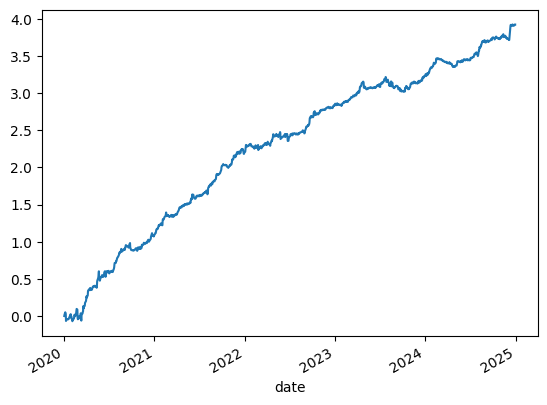

In [36]:
step0.plot()

In [44]:
returns = ae.returns
pure_return_signal_port_weights = ae.get_weights(0)
positive_weights = pure_return_signal_port_weights[pure_return_signal_port_weights > 0]
negative_weights = pure_return_signal_port_weights[pure_return_signal_port_weights < 0]

In [46]:
positive_port_ret = positive_weights.shift(1) * returns
negative_port_ret = negative_weights.shift(1) * returns

In [47]:
positive_port_pnl = positive_port_ret.sum(axis=1).cumsum()
negative_port_pnl = negative_port_ret.sum(axis=1).cumsum()

<Axes: xlabel='date'>

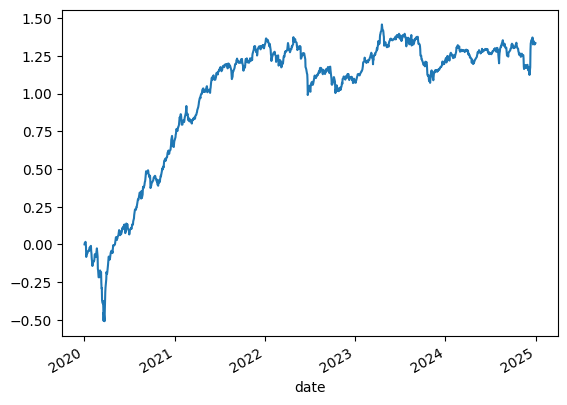

In [48]:
positive_port_pnl.plot()

<Axes: xlabel='date'>

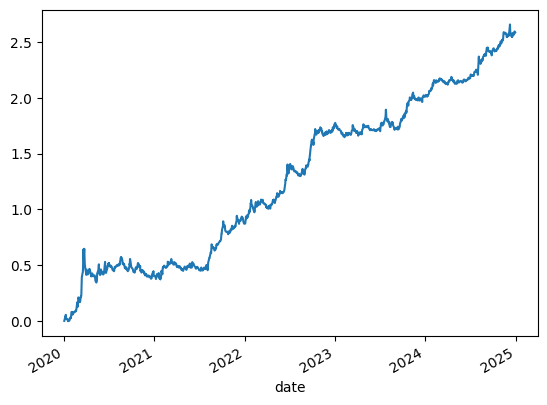

In [50]:
negative_port_pnl.plot()

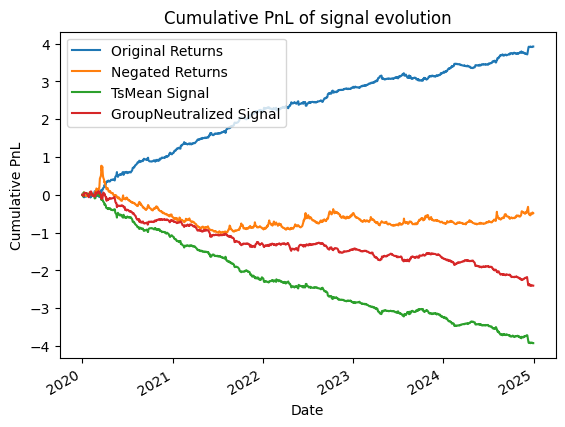

In [30]:
step0.plot(label='Original Returns')
step1.plot(label='Negated Returns')
step2.plot(label='TsMean Signal')
step3.plot(label='GroupNeutralized Signal')

plt.title('Cumulative PnL of signal evolution')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.show()


### 파마 프랜치 사이즈 팩터


In [16]:
# Step 1: 독립적인 사이즈 그룹 생성 (2개 bins: Small, Big)
size_group = LabelQuantile(Field('fnguide_market_cap'), bins=2, labels=['Small', 'Big'])
size_groups_df = ae.evaluate(size_group)
size_groups_df.head()

symbol     A000020 A000030 A000040 A000050 A000060 A000070 A000080 A000100  \
date                                                                         
2020-01-02     Big     NaN   Small     Big     Big     Big     Big     Big   
2020-01-03     Big     NaN   Small     Big     Big     Big     Big     Big   
2020-01-06     Big     NaN   Small     Big     Big     Big     Big     Big   
2020-01-07     Big     NaN   Small     Big     Big     Big     Big     Big   
2020-01-08     Big     NaN   Small     Big     Big     Big     Big     Big   

symbol     A000120 A000140  ... A950110 A950130 A950140 A950160 A950170  \
date                        ...                                           
2020-01-02     Big     Big  ...     Big   Small   Small     Big     Big   
2020-01-03     Big     Big  ...     Big   Small   Small     Big     Big   
2020-01-06     Big     Big  ...     Big   Small   Small     Big     Big   
2020-01-07     Big     Big  ...     Big   Small   Small     Big     Big   
2020-01-08     Big     Big  ...     Big   Small   Small     Big     Big   

symbol     A950180 A950190 A950200 A950210 A950220  
date                                                
2020-01-02     Big     NaN     NaN     NaN     NaN  
2020-01-03     Big     NaN     NaN     NaN     NaN  
2020-01-06     Big     NaN     NaN     NaN     NaN  
2020-01-07     Big     NaN     NaN     NaN     NaN  
2020-01-08     Big     NaN     NaN     NaN     NaN  

[5 rows x 2816 columns]

In [17]:
# 사이즈 그룹 분포 확인
sample_date = size_groups_df.index[30]
print(f"사이즈 분포 ({sample_date.strftime('%Y-%m-%d')}):")
print(size_groups_df.loc[sample_date].value_counts())

사이즈 분포 (2020-02-17):
2020-02-17 00:00:00
Small    1109
Big      1108
Name: count, dtype: int64


In [18]:
# Step 2: 가치 그룹 생성 (3개 bins: Low, Med, High)
# 주의: 실제 book-to-market 데이터가 없어서 float_ratio를 proxy로 사용
value_group = LabelQuantile(Field('fnguide_float_ratio_pct'), bins=3, labels=['Low', 'Med', 'High'])
value_groups_df = ae.evaluate(value_group)
value_groups_df.head()

symbol     A000020 A000030 A000040 A000050 A000060 A000070 A000080 A000100  \
date                                                                         
2020-01-02     Med     NaN     Low     Low     Low     Low     Low    High   
2020-01-03     Med     NaN     Low     Low     Low     Low     Low    High   
2020-01-06     Med     NaN     Low     Low     Low     Low     Low    High   
2020-01-07     Med     NaN     Low     Low     Low     Low     Low    High   
2020-01-08     Med     NaN     Low     Low     Low     Low     Low    High   

symbol     A000120 A000140  ... A950110 A950130 A950140 A950160 A950170  \
date                        ...                                           
2020-01-02     Low     Low  ...     Low    High     Med     Low     Low   
2020-01-03     Low     Low  ...     Low    High     Med     Low     Low   
2020-01-06     Low     Low  ...     Low    High     Med     Low     Low   
2020-01-07     Low     Low  ...     Low    High     Med     Low     Low   
2020-01-08     Low     Low  ...     Low    High     Med     Low     Low   

symbol     A950180 A950190 A950200 A950210 A950220  
date                                                
2020-01-02     Low     NaN     NaN     NaN     NaN  
2020-01-03     Low     NaN     NaN     NaN     NaN  
2020-01-06     Low     NaN     NaN     NaN     NaN  
2020-01-07     Low     NaN     NaN     NaN     NaN  
2020-01-08     Low     NaN     NaN     NaN     NaN  

[5 rows x 2816 columns]

In [19]:
# 가치 그룹 분포 확인
print(f"가치 분포 ({sample_date.strftime('%Y-%m-%d')}):")
print(value_groups_df.loc[sample_date].value_counts())

가치 분포 (2020-02-17):
2020-02-17 00:00:00
Low     739
Med     738
High    738
Name: count, dtype: int64


### 복합 그룹 생성 (2×3 = 6 포트폴리오)

In [20]:
# Step 3: CompositeGroup을 사용하여 사이즈와 가치 그룹을 결합
# 결과: Small&Low, Small&Med, Small&High, Big&Low, Big&Med, Big&High (6개 포트폴리오)
composite_group = CompositeGroup(
    size_group,
    value_group,
    separator='&'
)
composite_groups_df = ae.evaluate(composite_group)
composite_groups_df.head()

symbol      A000020 A000030    A000040  A000050  A000060  A000070  A000080  \
date                                                                         
2020-01-02  Big&Med     NaN  Small&Low  Big&Low  Big&Low  Big&Low  Big&Low   
2020-01-03  Big&Med     NaN  Small&Low  Big&Low  Big&Low  Big&Low  Big&Low   
2020-01-06  Big&Med     NaN  Small&Low  Big&Low  Big&Low  Big&Low  Big&Low   
2020-01-07  Big&Med     NaN  Small&Low  Big&Low  Big&Low  Big&Low  Big&Low   
2020-01-08  Big&Med     NaN  Small&Low  Big&Low  Big&Low  Big&Low  Big&Low   

symbol       A000100  A000120  A000140  ...  A950110     A950130    A950140  \
date                                    ...                                   
2020-01-02  Big&High  Big&Low  Big&Low  ...  Big&Low  Small&High  Small&Med   
2020-01-03  Big&High  Big&Low  Big&Low  ...  Big&Low  Small&High  Small&Med   
2020-01-06  Big&High  Big&Low  Big&Low  ...  Big&Low  Small&High  Small&Med   
2020-01-07  Big&High  Big&Low  Big&Low  ...  Big&Low  Small&High  Small&Med   
2020-01-08  Big&High  Big&Low  Big&Low  ...  Big&Low  Small&High  Small&Med   

symbol      A950160  A950170  A950180 A950190 A950200 A950210 A950220  
date                                                                   
2020-01-02  Big&Low  Big&Low  Big&Low     NaN     NaN     NaN     NaN  
2020-01-03  Big&Low  Big&Low  Big&Low     NaN     NaN     NaN     NaN  
2020-01-06  Big&Low  Big&Low  Big&Low     NaN     NaN     NaN     NaN  
2020-01-07  Big&Low  Big&Low  Big&Low     NaN     NaN     NaN     NaN  
2020-01-08  Big&Low  Big&Low  Big&Low     NaN     NaN     NaN     NaN  

[5 rows x 2816 columns]

In [21]:
# 포트폴리오 분포 확인
print(f"포트폴리오 분포 ({sample_date.strftime('%Y-%m-%d')}):")
print(composite_groups_df.loc[sample_date].value_counts().sort_index())

포트폴리오 분포 (2020-02-17):
2020-02-17 00:00:00
Big&High      300
Big&Low       437
Big&Med       370
Small&High    438
Small&Low     302
Small&Med     368
Name: count, dtype: int64


### SMB 팩터 시그널 할당

In [ ]:
mask_g1 = np.where(size > np.nanpercentile(size, 2/3), True, False)


In [22]:
# Step 4: SMB 팩터를 위한 방향성 시그널 할당
# SMB = Small 포트폴리오 평균 - Big 포트폴리오 평균
# Small 포트폴리오: +1/3 (3개 포트폴리오 × 1/3 = +1.0)
# Big 포트폴리오: -1/3 (3개 포트폴리오 × -1/3 = -1.0)

smb_mapping = {
    'Small&Low': 1/3, 'Small&Med': 1/3, 'Small&High': 1/3,
    'Big&Low': -1/3, 'Big&Med': -1/3, 'Big&High': -1/3
}

smb_signals = MapValues(composite_group, mapping=smb_mapping)
smb_signals_df = ae.evaluate(smb_signals)
smb_signals_df.head()

symbol       A000020  A000030   A000040   A000050   A000060   A000070  \
date                                                                    
2020-01-02 -0.333333      NaN  0.333333 -0.333333 -0.333333 -0.333333   
2020-01-03 -0.333333      NaN  0.333333 -0.333333 -0.333333 -0.333333   
2020-01-06 -0.333333      NaN  0.333333 -0.333333 -0.333333 -0.333333   
2020-01-07 -0.333333      NaN  0.333333 -0.333333 -0.333333 -0.333333   
2020-01-08 -0.333333      NaN  0.333333 -0.333333 -0.333333 -0.333333   

symbol       A000080   A000100   A000120   A000140  ...   A950110   A950130  \
date                                                ...                       
2020-01-02 -0.333333 -0.333333 -0.333333 -0.333333  ... -0.333333  0.333333   
2020-01-03 -0.333333 -0.333333 -0.333333 -0.333333  ... -0.333333  0.333333   
2020-01-06 -0.333333 -0.333333 -0.333333 -0.333333  ... -0.333333  0.333333   
2020-01-07 -0.333333 -0.333333 -0.333333 -0.333333  ... -0.333333  0.333333   
2020-01-08 -0.333333 -0.333333 -0.333333 -0.333333  ... -0.333333  0.333333   

symbol       A950140   A950160   A950170   A950180  A950190  A950200  A950210  \
date                                                                            
2020-01-02  0.333333 -0.333333 -0.333333 -0.333333      NaN      NaN      NaN   
2020-01-03  0.333333 -0.333333 -0.333333 -0.333333      NaN      NaN      NaN   
2020-01-06  0.333333 -0.333333 -0.333333 -0.333333      NaN      NaN      NaN   
2020-01-07  0.333333 -0.333333 -0.333333 -0.333333      NaN      NaN      NaN   
2020-01-08  0.333333 -0.333333 -0.333333 -0.333333      NaN      NaN      NaN   

symbol      A950220  
date                 
2020-01-02      NaN  
2020-01-03      NaN  
2020-01-06      NaN  
2020-01-07      NaN  
2020-01-08      NaN  

[5 rows x 2816 columns]

In [23]:
# 시그널 분포 및 Net Exposure 확인
print(f"시그널 분포 ({sample_date.strftime('%Y-%m-%d')}):")
print(smb_signals_df.loc[sample_date].value_counts().sort_index())
print(f"\nNet Exposure: {smb_signals_df.loc[sample_date].sum():.6f} (목표: 0.0)")

시그널 분포 (2020-02-17):
2020-02-17 00:00:00
-0.333333    1107
 0.333333    1108
Name: count, dtype: int64

Net Exposure: 0.333333 (목표: 0.0)


### 포트폴리오 내 시가총액 가중치 적용

In [24]:
# Step 5: GroupScalePositive를 사용하여 각 포트폴리오 내에서 시가총액 가중치 적용
# 각 주식의 가중치 = (시가총액 / 포트폴리오 내 시가총액 합계)
# 각 포트폴리오는 독립적으로 1.0으로 정규화됨

value_weights = GroupScalePositive(
    Field('fnguide_market_cap'),
    group_by=composite_group
)
value_weights_df = ae.evaluate(value_weights)
value_weights_df.head()

symbol       A000020  A000030   A000040   A000050   A000060   A000070  \
date                                                                    
2020-01-02  0.000580      NaN  0.002780  0.000690  0.005124  0.001515   
2020-01-03  0.000579      NaN  0.002728  0.000693  0.005140  0.001506   
2020-01-06  0.000573      NaN  0.002672  0.000702  0.005082  0.001476   
2020-01-07  0.000564      NaN  0.002581  0.000698  0.004964  0.001480   
2020-01-08  0.000563      NaN  0.002619  0.000694  0.005016  0.001444   

symbol       A000080   A000100   A000120   A000140  ...   A950110   A950130  \
date                                                ...                       
2020-01-02  0.005327  0.003884  0.009143  0.000805  ...  0.000658  0.002906   
2020-01-03  0.005279  0.003861  0.008901  0.000814  ...  0.000648  0.002904   
2020-01-06  0.005394  0.003824  0.009003  0.000841  ...  0.000645  0.002876   
2020-01-07  0.005312  0.003855  0.008928  0.000834  ...  0.000656  0.002889   
2020-01-08  0.005308  0.003787  0.008944  0.000853  ...  0.000655  0.002833   

symbol       A950140   A950160   A950170   A950180  A950190  A950200  A950210  \
date                                                                            
2020-01-02  0.003828  0.001287  0.000821  0.000922      NaN      NaN      NaN   
2020-01-03  0.004019  0.001291  0.000822  0.000969      NaN      NaN      NaN   
2020-01-06  0.004137  0.001314  0.000804  0.000958      NaN      NaN      NaN   
2020-01-07  0.004087  0.001303  0.000791  0.000953      NaN      NaN      NaN   
2020-01-08  0.004177  0.001338  0.000773  0.000950      NaN      NaN      NaN   

symbol      A950220  
date                 
2020-01-02      NaN  
2020-01-03      NaN  
2020-01-06      NaN  
2020-01-07      NaN  
2020-01-08      NaN  

[5 rows x 2816 columns]

In [25]:
# 포트폴리오별 가중치 합계 확인 (각 포트폴리오는 1.0이 되어야 함)
print(f"포트폴리오별 가중치 합계 ({sample_date.strftime('%Y-%m-%d')}):")
for portfolio in composite_groups_df.loc[sample_date].dropna().unique():
    mask = composite_groups_df.loc[sample_date] == portfolio
    portfolio_sum = value_weights_df.loc[sample_date][mask].sum()
    print(f"  {portfolio:15s}: {portfolio_sum:.6f}")

포트폴리오별 가중치 합계 (2020-02-17):
  Big&Med        : 1.000000
  Small&Low      : 1.000000
  Big&Low        : 1.000000
  Big&High       : 1.000000
  Small&Med      : 1.000000
  Small&High     : 1.000000


### 최종 SMB 포트폴리오 가중치 계산

In [26]:
# Step 6: 시그널과 가중치를 곱하여 최종 SMB 포트폴리오 가중치 생성
# 최종 가중치 = signal × value_weight
# 각 주식의 가중치 = (±1/3) × (시가총액 / 포트폴리오 내 시가총액 합계)

smb_weights = Multiply(smb_signals, value_weights)
smb_weights_df = ae.evaluate(smb_weights)
smb_weights_df.head()

symbol       A000020  A000030   A000040   A000050   A000060   A000070  \
date                                                                    
2020-01-02 -0.000193      NaN  0.000927 -0.000230 -0.001708 -0.000505   
2020-01-03 -0.000193      NaN  0.000909 -0.000231 -0.001713 -0.000502   
2020-01-06 -0.000191      NaN  0.000891 -0.000234 -0.001694 -0.000492   
2020-01-07 -0.000188      NaN  0.000860 -0.000233 -0.001655 -0.000493   
2020-01-08 -0.000188      NaN  0.000873 -0.000231 -0.001672 -0.000481   

symbol       A000080   A000100   A000120   A000140  ...   A950110   A950130  \
date                                                ...                       
2020-01-02 -0.001776 -0.001295 -0.003048 -0.000268  ... -0.000219  0.000969   
2020-01-03 -0.001760 -0.001287 -0.002967 -0.000271  ... -0.000216  0.000968   
2020-01-06 -0.001798 -0.001275 -0.003001 -0.000280  ... -0.000215  0.000959   
2020-01-07 -0.001771 -0.001285 -0.002976 -0.000278  ... -0.000219  0.000963   
2020-01-08 -0.001769 -0.001262 -0.002981 -0.000284  ... -0.000218  0.000944   

symbol       A950140   A950160   A950170   A950180  A950190  A950200  A950210  \
date                                                                            
2020-01-02  0.001276 -0.000429 -0.000274 -0.000307      NaN      NaN      NaN   
2020-01-03  0.001340 -0.000430 -0.000274 -0.000323      NaN      NaN      NaN   
2020-01-06  0.001379 -0.000438 -0.000268 -0.000319      NaN      NaN      NaN   
2020-01-07  0.001362 -0.000434 -0.000264 -0.000318      NaN      NaN      NaN   
2020-01-08  0.001392 -0.000446 -0.000258 -0.000317      NaN      NaN      NaN   

symbol      A950220  
date                 
2020-01-02      NaN  
2020-01-03      NaN  
2020-01-06      NaN  
2020-01-07      NaN  
2020-01-08      NaN  

[5 rows x 2816 columns]

In [27]:
# 포트폴리오 익스포저 확인
long_exposure = smb_weights_df.loc[sample_date].where(smb_weights_df.loc[sample_date] > 0, 0).sum()
short_exposure = smb_weights_df.loc[sample_date].where(smb_weights_df.loc[sample_date] < 0, 0).sum()
gross_exposure = smb_weights_df.loc[sample_date].abs().sum()
net_exposure = smb_weights_df.loc[sample_date].sum()

print(f"포트폴리오 익스포저 ({sample_date.strftime('%Y-%m-%d')}):")
print(f"  Long:  {long_exposure:+.6f} (목표: +1.0)")
print(f"  Short: {short_exposure:+.6f} (목표: -1.0)")
print(f"  Gross: {gross_exposure:+.6f} (목표: 2.0)")
print(f"  Net:   {net_exposure:+.6f} (목표: 0.0)")

포트폴리오 익스포저 (2020-02-17):
  Long:  +1.000000 (목표: +1.0)
  Short: -1.000000 (목표: -1.0)
  Gross: +2.000000 (목표: 2.0)
  Net:   -0.000000 (목표: 0.0)


In [28]:
# 샘플 가중치 확인 (특정 날짜의 일부 주식들)
market_cap_df = ae.evaluate(Field('fnguide_market_cap'))

sample_weights_df = pd.DataFrame({
    'Market Cap': market_cap_df.loc[sample_date][:10],
    'Portfolio': composite_groups_df.loc[sample_date][:10],
    'Signal': smb_signals_df.loc[sample_date][:10],
    'Value Weight': value_weights_df.loc[sample_date][:10],
    'Final Weight': smb_weights_df.loc[sample_date][:10]
})
sample_weights_df

Market Cap  Portfolio    Signal  Value Weight Final Weight
symbol                                                               
A000020  2.108830e+11    Big&Med -0.333333      0.000508    -0.000169
A000030           NaN        NaN       NaN           NaN          NaN
A000040  4.736100e+10  Small&Low  0.333333      0.002341      0.00078
A000050  2.618160e+11    Big&Low -0.333333      0.000703    -0.000234
A000060  1.727936e+12    Big&Low -0.333333      0.004640    -0.001547
A000070  4.847380e+11    Big&Low -0.333333      0.001302    -0.000434
A000080  2.082968e+12    Big&Low -0.333333      0.005594    -0.001865
A000100  2.948385e+12   Big&High -0.333333      0.003494    -0.001165
A000120  3.227947e+12    Big&Low -0.333333      0.008669     -0.00289
A000140  3.237340e+11    Big&Low -0.333333      0.000869     -0.00029

### SMB 팩터 백테스트

In [29]:
# AlphaExcel의 백테스트 기능을 사용하여 SMB 팩터 성과 평가
# smb_weights를 시그널로 사용하고, DollarNeutralScaler를 적용

scaler = DollarNeutralScaler()
result = ae.evaluate(smb_weights, scaler=scaler)

# 누적 수익률 계산
smb_pnl = ae.get_final_cumulative_pnl()
smb_pnl.head()

C:\Users\chlje\VSCodeProjects\alpha-excel\src\alpha_excel\portfolio\strategies.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  norm_pos = norm_pos.infer_objects(copy=False).fillna(0)
C:\Users\chlje\VSCodeProjects\alpha-excel\src\alpha_excel\portfolio\strategies.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  norm_neg = norm_neg.infer_objects(copy=False).fillna(0)
C:\Users\chlje\VSCodeProjects\alpha-excel\src\alpha_excel\portfolio\strategies.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will c

date
2020-01-02    0.000000
2020-01-03    0.004489
2020-01-06    0.002172
2020-01-07   -0.001236
2020-01-08   -0.019086
dtype: float64

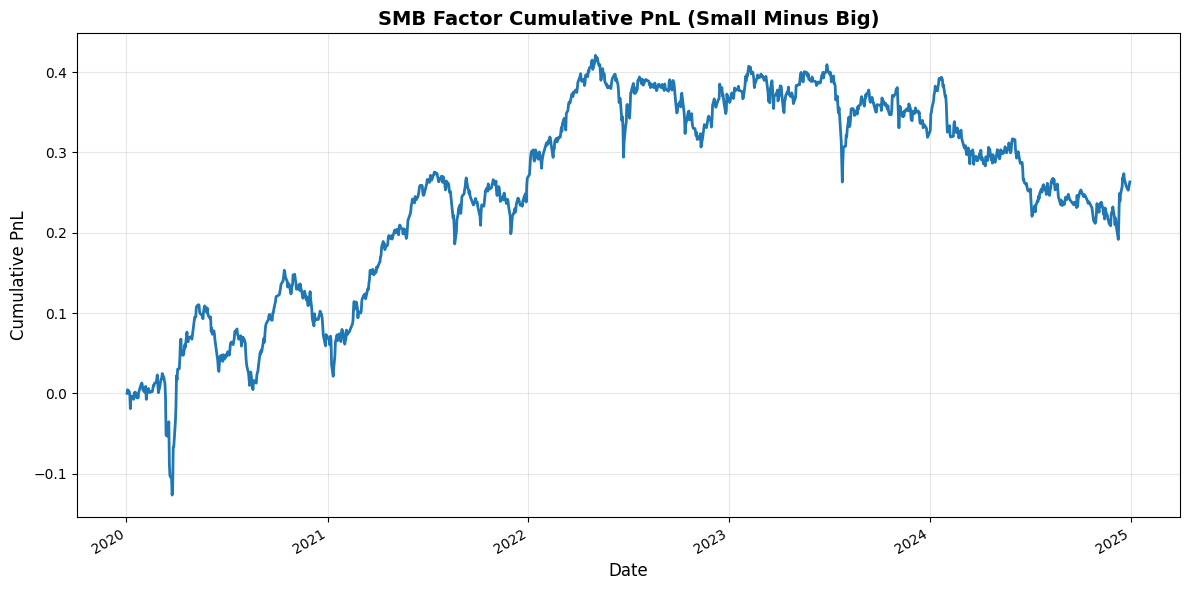

In [30]:
# SMB 팩터 누적 수익률 시각화
plt.figure(figsize=(12, 6))
smb_pnl.plot(linewidth=2)
plt.title('SMB Factor Cumulative PnL (Small Minus Big)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative PnL', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# 통계 요약
print("SMB 팩터 성과 통계:")
print(f"  총 수익률: {smb_pnl.iloc[-1]:.4f}")
print(f"  연율화 수익률: {(smb_pnl.iloc[-1] / len(smb_pnl) * 252):.4f}")
print(f"  샤프 비율 (추정): {(smb_pnl.pct_change().mean() / smb_pnl.pct_change().std() * np.sqrt(252)):.4f}")

SMB 팩터 성과 통계:
  총 수익률: 0.2632
  연율화 수익률: 0.0539
  샤프 비율 (추정): nan


### 동등가중 SMB 팩터 (비교)

In [32]:
# 시가총액 대신 Constant(1)을 사용하여 동등가중 포트폴리오 생성
equal_weights = GroupScalePositive(
    Constant(1),
    group_by=composite_group
)
equal_weights_df = ae.evaluate(equal_weights)

# 동등가중 SMB 가중치
smb_weights_ew = Multiply(smb_signals, equal_weights)
smb_weights_ew_df = ae.evaluate(smb_weights_ew)

In [33]:
# 동등가중 익스포저 확인
long_ew = smb_weights_ew_df.loc[sample_date].where(smb_weights_ew_df.loc[sample_date] > 0, 0).sum()
short_ew = smb_weights_ew_df.loc[sample_date].where(smb_weights_ew_df.loc[sample_date] < 0, 0).sum()

print(f"동등가중 포트폴리오 익스포저 ({sample_date.strftime('%Y-%m-%d')}):")
print(f"  Long:  {long_ew:+.6f}")
print(f"  Short: {short_ew:+.6f}")
print(f"  Net:   {long_ew + short_ew:+.6f}")

동등가중 포트폴리오 익스포저 (2020-02-17):
  Long:  +1.000000
  Short: -1.000000
  Net:   +0.000000


### 시가총액 가중 vs 동등가중 비교

In [34]:
# 특정 포트폴리오의 가중치 집중도 비교
sample_portfolio = 'Small&Low'
mask = composite_groups_df.loc[sample_date] == sample_portfolio

if mask.sum() > 0:
    comparison_df = pd.DataFrame({
        'Market Cap': market_cap_df.loc[sample_date][mask],
        'Value Weight': value_weights_df.loc[sample_date][mask],
        'Equal Weight': equal_weights_df.loc[sample_date][mask]
    }).sort_values('Market Cap', ascending=False)
    
    print(f"{sample_portfolio} 포트폴리오 (n={mask.sum()} 주식):")
    print("\n상위 5개 주식 (시가총액 기준):")
    print(comparison_df.head())
    
    print(f"\n가중치 집중도 (상위 5개 주식):")
    print(f"  시가총액 가중: {comparison_df['Value Weight'].head().sum():.1%}")
    print(f"  동등가중: {comparison_df['Equal Weight'].head().sum():.1%}")

Small&Low 포트폴리오 (n=302 주식):

상위 5개 주식 (시가총액 기준):
           Market Cap  Value Weight  Equal Weight
symbol                                           
A263770  1.130500e+11      0.005588      0.003311
A003830  1.128800e+11      0.005580      0.003311
A267290  1.123070e+11      0.005552      0.003311
A007540  1.115810e+11      0.005516      0.003311
A290720  1.112790e+11      0.005501      0.003311

가중치 집중도 (상위 5개 주식):
  시가총액 가중: 2.8%
  동등가중: 1.7%


## 요약

이 노트북에서는 AlphaExcel의 주요 기능들을 시연했습니다:

1. **기본 데이터 로딩**: `Field`를 사용한 데이터 접근
2. **시계열 연산자**: `TsMean` 등을 활용한 시계열 신호 생성
3. **그룹 연산자**: `GroupNeutralize`를 통한 산업 중립화
4. **파마-프렌치 팩터 구축**:
   - `LabelQuantile`: 독립적인 사이즈/가치 그룹화
   - `CompositeGroup`: 2×3 포트폴리오 생성
   - `MapValues`: 방향성 시그널 할당
   - `GroupScalePositive`: 포트폴리오 내 가중치 계산
   - `Multiply`: 시그널과 가중치 결합
5. **백테스팅**: 누적 수익률 계산 및 시각화

### 핵심 개념

- **Expression 기반 설계**: 모든 연산은 Expression 객체로 표현되며, `evaluate()`로 실행
- **지연 평가**: 데이터는 필요할 때만 로드됨
- **조합 가능성**: 연산자들을 자유롭게 조합하여 복잡한 신호 생성 가능
- **그룹 연산**: 포트폴리오 구축과 팩터 생성을 위한 강력한 그룹 연산 지원